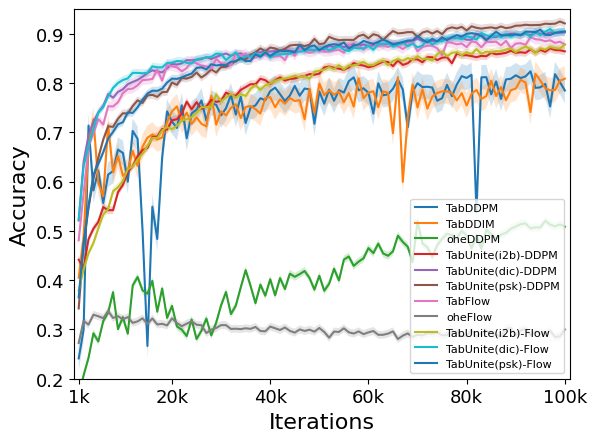

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# File paths
file_paths = {
    'TabDDPM': '/voyager/projects/jacobyhsi/TabUnite/tabunite_syn_quant/methods/tabddpm/ckpt/sync/acc.csv',
    'TabDDIM': '/voyager/projects/jacobyhsi/TabUnite/tabunite_syn_quant/methods/tabddim/ckpt/sync/acc.csv',
    'oheDDPM': '/voyager/projects/jacobyhsi/TabUnite/tabunite_syn_quant/methods/oheddpm/ckpt/sync/acc.csv',
    'TabUnite(i2b)-DDPM': '/voyager/projects/jacobyhsi/TabUnite/tabunite_syn_quant/methods/i2bddpm/ckpt/sync/acc.csv',
    'TabUnite(dic)-DDPM': '/voyager/projects/jacobyhsi/TabUnite/tabunite_syn_quant/methods/dicddpm/ckpt/sync/acc.csv',
    'TabUnite(psk)-DDPM': '/voyager/projects/jacobyhsi/TabUnite/tabunite_syn_quant/methods/pskddpm/ckpt/sync/acc.csv',
    'TabFlow': '/voyager/projects/jacobyhsi/TabUnite/tabunite_syn_quant/methods/tabflow/ckpt/sync/acc.csv',
    'oheFlow': '/voyager/projects/jacobyhsi/TabUnite/tabunite_syn_quant/methods/oheflow/ckpt/sync/acc.csv',
    'TabUnite(i2b)-Flow': '/voyager/projects/jacobyhsi/TabUnite/tabunite_syn_quant/methods/i2bflow/ckpt/sync/acc.csv',
    'TabUnite(dic)-Flow': '/voyager/projects/jacobyhsi/TabUnite/tabunite_syn_quant/methods/dicflow/ckpt/sync/acc.csv',
    'TabUnite(psk)-Flow': '/voyager/projects/jacobyhsi/TabUnite/tabunite_syn_quant/methods/pskflow/ckpt/sync/acc.csv',
}

# Read and process data
data = {}
for name, path in file_paths.items():
    df = pd.read_csv(path)
    df.columns = ['Iterations', 'Accuracy']
    data[name] = df

# Plot each line
for name, df in data.items():
    plt.plot(df['Iterations'], df['Accuracy'], label=name)
    if name == 'TabDDIM':
        plt.fill_between(df['Iterations'], 
                        df['Accuracy'] - 0.025, 
                        df['Accuracy'] + 0.025, 
                        alpha=0.2)
        
    elif name == 'TabDDPM':
        plt.fill_between(df['Iterations'], 
                        df['Accuracy'] - 0.025, 
                        df['Accuracy'] + 0.025, 
                        alpha=0.2)
        
    elif name == 'TabFlow' or name == 'TabUnite-dicFlow' or name == 'TabUnite-i2bFlow':
        plt.fill_between(df['Iterations'], 
                            df['Accuracy'] - 0.01, 
                            df['Accuracy'] + 0.01, 
                            alpha=0.2)
    else:
        plt.fill_between(df['Iterations'], 
                                df['Accuracy'] - 0.008, 
                                df['Accuracy'] + 0.008, 
                                alpha=0.2)

# Customize the plot
plt.xlim(0, 101000)
plt.ylim(0.2, 0.95)
plt.xlabel('Iterations', fontsize="16")
plt.ylabel('Accuracy', fontsize="16")
plt.legend(fontsize="8", loc='lower right')

# Add minor grid lines
plt.grid(which='minor', linestyle=':', alpha=0.4)

# Customize x-axis ticks
plt.xticks([1000, 20000, 40000, 60000, 80000, 100000], 
           ['1k', '20k', '40k', '60k', '80k', '100k'], fontsize="13")
plt.yticks(fontsize="13")

# Save the plot
plt.savefig('accuracy_plot.pdf', dpi=300, bbox_inches='tight', pad_inches=0.01)
plt.show()